In [1]:
import heeps
from heeps.wavefront.get_array import show_wf
from heeps.util.img_processing import crop_img
import matplotlib.pyplot as plt
import numpy as np

Simulation config: band=L, mode=CVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=1024, diam_norm=1.0838, beam_ratio=0.2568
   npupil=285, pscale=5.4700 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> 51.74 lam/D)
   detector size (ndet)=403 (103.49 lam/D)

Entrance pupil: loaded from 'ELT_fullM1_nov2024.fits'
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_all_ncpa_L_285.fits'
   nscreens=100 (nframes=100, nstep=1)
Create on-axis PSF cube
   apply vortex phase mask
   adding chromatic leakage at vortex plane: 0.002
   apply Lyot stop: circ_ext/int=[False, False], ls_dRext/int/spi=[0.0209, 0.09, 0.0245], ls_misalign=None
   2025-01-27 14:33:12, e2e simulation using 12 cores
   2025-01-27 14:34:16, completed in 63.68 seconds
Average PSF cube



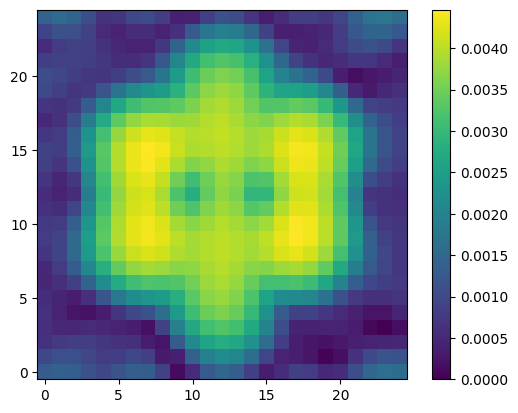

In [2]:
conf = dict(
    band = 'L', mode = 'CVC',
    ls_dRext=0.0209, ls_dRint=0.09, ls_dRspi=0.0245,
    nframes_avg = 100,
    f_phase = 'wavefront/cfull/cube_Cfull_20220512_3600s_300ms_0piston_meters_all_ncpa_L_285.fits',
    add_cl_vort = True,
    vc_chrom_leak = 2e-3,
    )
verbose = True
conf = heeps.config.read_config(**conf)
conf = heeps.config.update_config(verbose=verbose, **conf)
wf1 = heeps.pupil.pupil(verbose=verbose, **conf)
show_wf(wf1, 'amp', npupil=conf['npupil']);
psf1 = heeps.wavefront.propagate(wf1, avg=True, onaxis=True, verbose=verbose, **conf)
plt.imshow(np.log10(crop_img(psf1, 25)), origin='lower');

Simulation config: band=L, mode=CVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=285, pscale=5.4700 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> 51.74 lam/D)
   detector size (ndet)=403 (103.49 lam/D)

Entrance pupil: loaded from 'ELT_fullM1_nov2024.fits'
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_all_ncpa_L_285.fits'
   nscreens=100 (nframes=100, nstep=1)
Create on-axis PSF cube
   apply vortex phase mask
   adding chromatic leakage at detector plane: 0.002
   apply Lyot stop: circ_ext/int=[False, False], ls_dRext/int/spi=[0.0209, 0.09, 0.0245], ls_misalign=None
   2025-01-27 14:34:27, e2e simulation using 12 cores
   2025-01-27 14:35:47, completed in 79.75 seconds
Average PSF cube



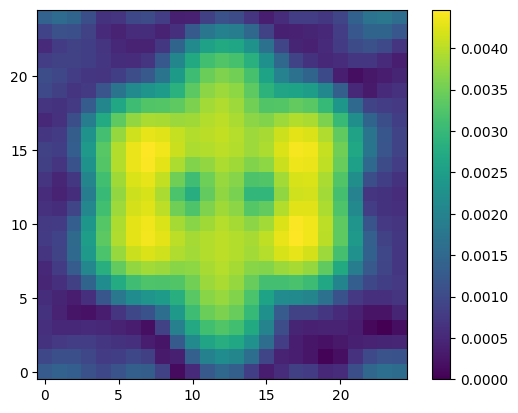

In [3]:
conf.update(
    add_cl_vort = False,
    add_cl_det = True,
    )
verbose = True
conf = heeps.config.read_config(**conf)
conf = heeps.config.update_config(verbose=verbose, **conf)
wf2 = heeps.pupil.pupil(verbose=verbose, **conf)
show_wf(wf2, 'amp', npupil=conf['npupil']);
psf2 = heeps.wavefront.propagate(wf2, avg=True, onaxis=True, verbose=verbose, **conf)
plt.imshow(np.log10(crop_img(psf2, 25)), origin='lower');